In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Load the data
df = pd.read_csv('kag_risk_factors_cervical_cancer.csv')
df = df.replace('?', pd.NA)
# Identify the columns with numeric data
num_cols = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']



FileNotFoundError: [Errno 2] No such file or directory: 'kag_risk_factors_cervical_cancer'

# Preprocessing

##### Replacing NaN values

For columns containing numeric data, NaN values are replaced with the mean value of the column. For columns containing categorical data, NaN values are replaced with the mode value of the column.


In [ ]:
# Convert the selected columns to numeric type
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')
mode = df['Number of sexual partners'].mode()[0]
df['Number of sexual partners'].fillna(mode, inplace=True)
df[num_cols[1:]] = df[num_cols[1:]].apply(pd.to_numeric, errors='coerce')

mode = df['First sexual intercourse'].mode()[0]
df['First sexual intercourse'].fillna(mode, inplace=True)
df[num_cols[1:]] = df[num_cols[1:]].apply(pd.to_numeric, errors='coerce')

mean = df['Num of pregnancies'].mean()
df['Num of pregnancies'].fillna(mean, inplace=True)
df[num_cols[1:]] = df[num_cols[1:]].apply(pd.to_numeric, errors='coerce')


# Replace missing values in 'Smokes' column
df['Smokes'] = pd.to_numeric(df['Smokes'], errors='coerce')
mean_smokes = df['Smokes'].mean()
df['Smokes'].fillna(mean_smokes, inplace=True)

# Replace missing values in 'Smokes (years)' column
df['Smokes (years)'] = pd.to_numeric(df['Smokes (years)'], errors='coerce')
mean_smokes_years = df['Smokes (years)'].mean()
df['Smokes (years)'].fillna(mean_smokes_years, inplace=True)

# Replace missing values in 'Smokes (packs/year)' column
df['Smokes (packs/year)'] = pd.to_numeric(df['Smokes (packs/year)'], errors='coerce')
mean_smokes_packs_year = df['Smokes (packs/year)'].mean()
df['Smokes (packs/year)'].fillna(mean_smokes_packs_year, inplace=True)

df[num_cols[4:]] = df[num_cols[4:]].apply(pd.to_numeric, errors='coerce')

# Replace missing values in 'IUD' column
df['IUD'] = pd.to_numeric(df['IUD'], errors='coerce')
mean_iud = df['IUD'].mean()
df['IUD'].fillna(mean_iud, inplace=True)

# Replace missing values in 'IUD (years)' column
df['IUD (years)'] = pd.to_numeric(df['IUD (years)'], errors='coerce')
mean_iud_years = df['IUD (years)'].mean()
df['IUD (years)'].fillna(mean_iud_years, inplace=True)

df[num_cols[8:]] = df[num_cols[8:]].apply(pd.to_numeric, errors='coerce')



# Replace missing values in 'STDs: Time since first diagnosis' column
df['STDs: Time since first diagnosis'] = pd.to_numeric(df['STDs: Time since first diagnosis'], errors='coerce')
mean_first_diag = df['STDs: Time since first diagnosis'].mean()
df['STDs: Time since first diagnosis'].fillna(mean_first_diag, inplace=True)

# Replace missing values in 'STDs: Time since last diagnosis' column
df['STDs: Time since last diagnosis'] = pd.to_numeric(df['STDs: Time since last diagnosis'], errors='coerce')
mean_last_diag = df['STDs: Time since last diagnosis'].mean()
df['STDs: Time since last diagnosis'].fillna(mean_last_diag, inplace=True)

df[num_cols[8:]] = df[num_cols[8:]].apply(pd.to_numeric, errors='coerce')

# Identify the columns with numeric data
nums_cols = ['STDs:HPV','STDs:Hepatitis B','STDs:HIV','STDs (number)','Hormonal Contraceptives','Hormonal Contraceptives (years)', 'STDs', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS']

# Convert the selected columns to numeric type
df[nums_cols] = df[nums_cols].apply(pd.to_numeric, errors='coerce')


 
for col in nums_cols:
    mode_val = df[col].mode().iloc[0]
    df[col].fillna(mode_val, inplace=True)

# df=df.drop_duplicates()



### Checking for outliers

##### we plot the box plot to check in which columns we are getting more outliers

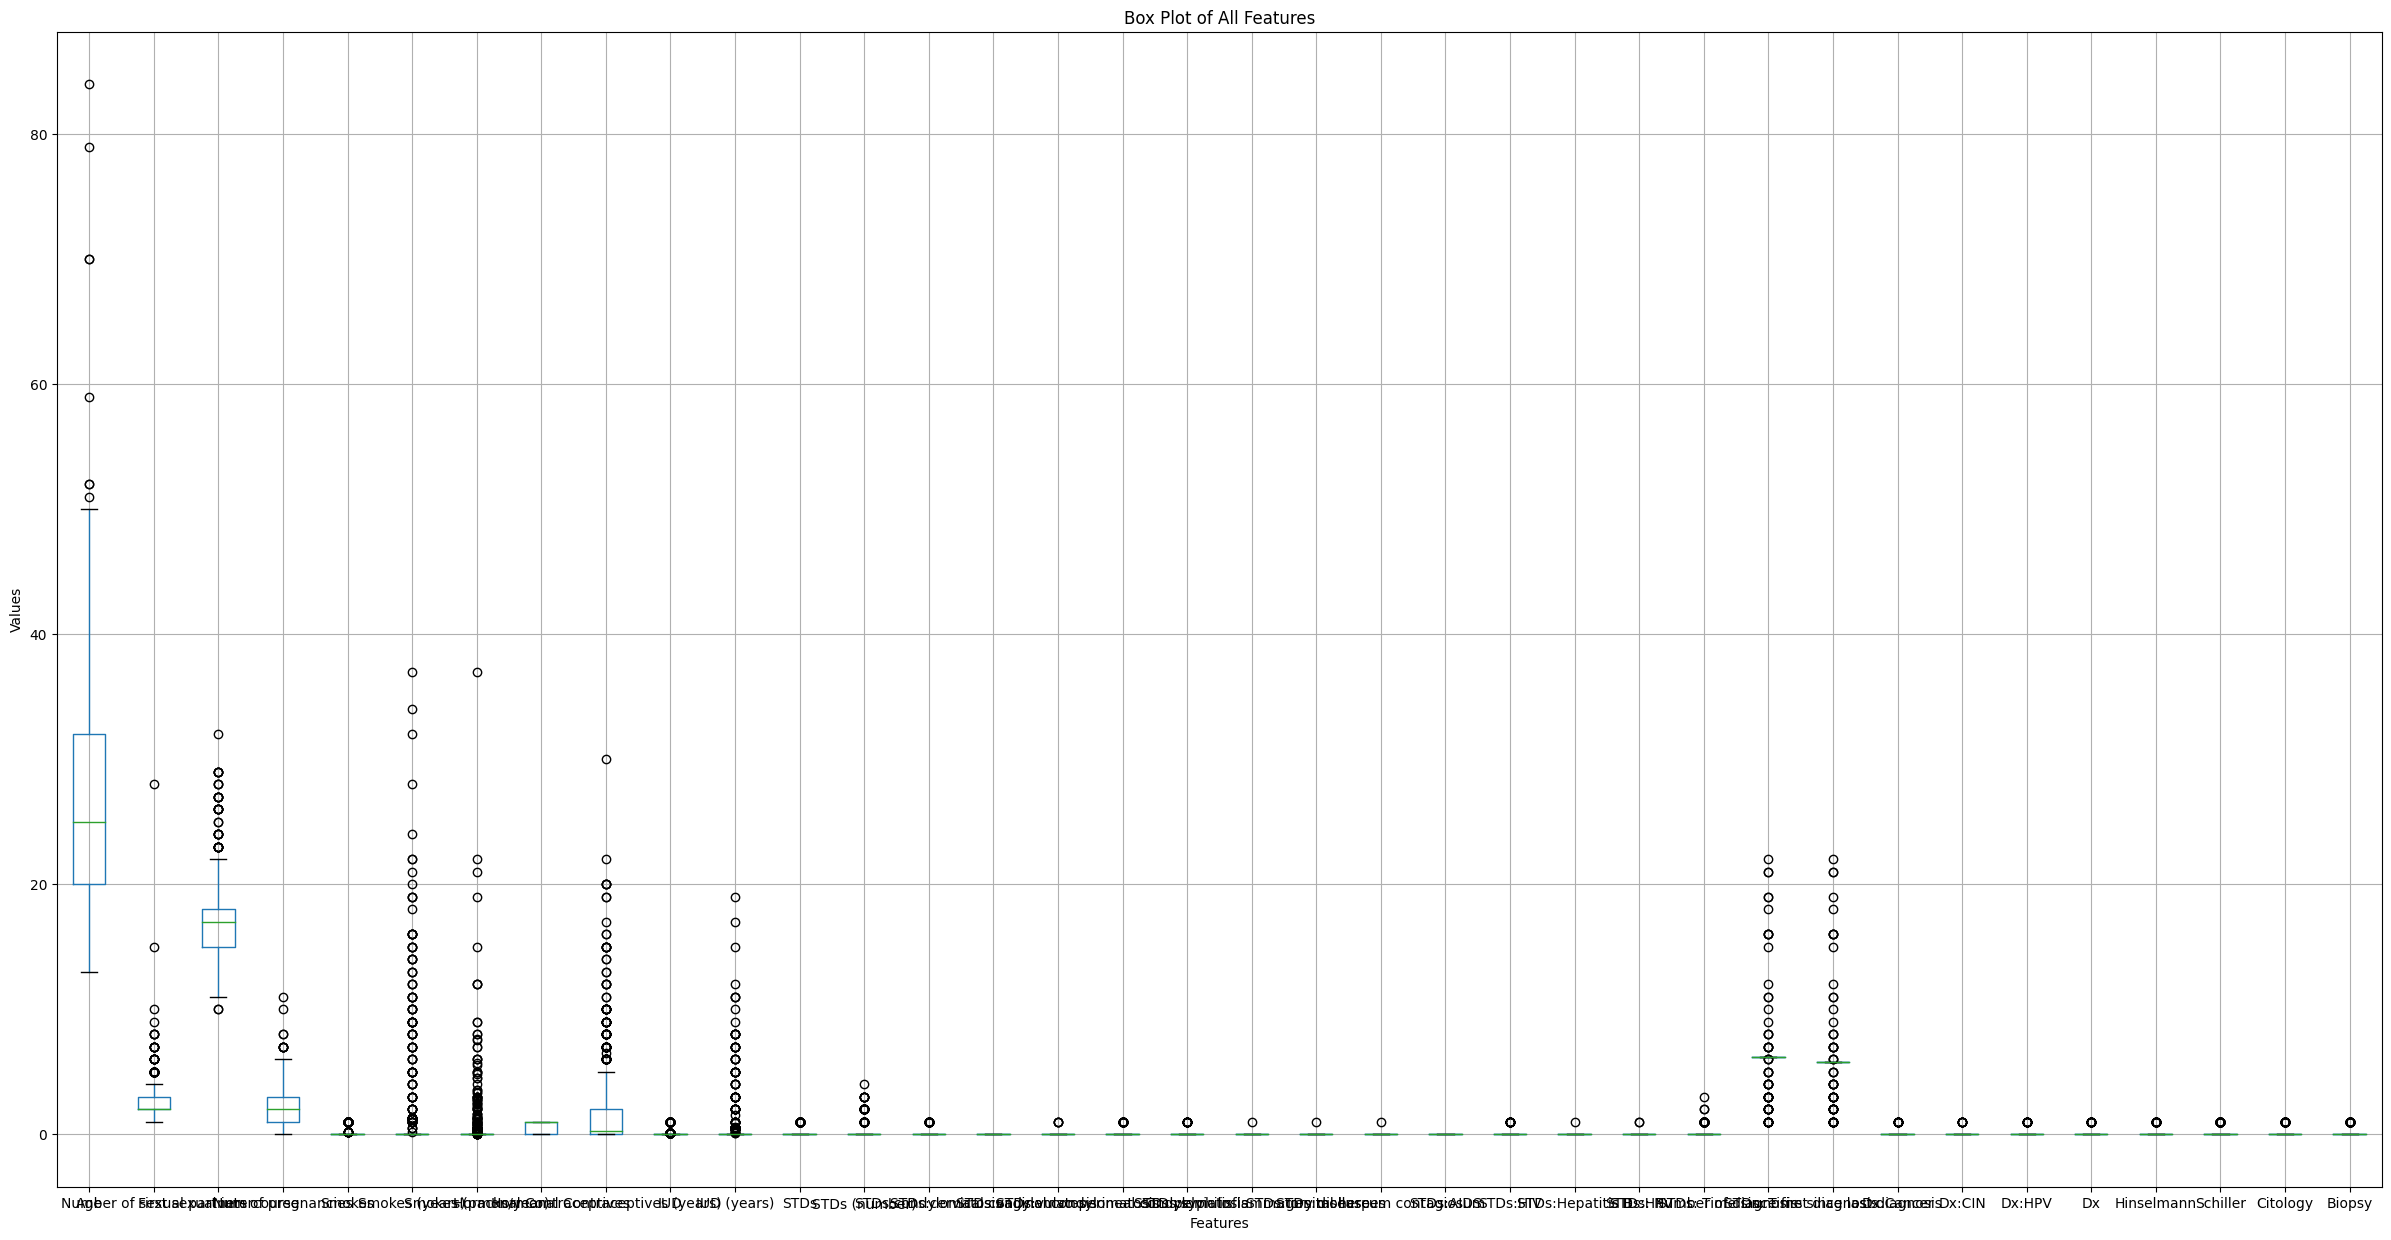

In [ ]:

# Create box plot for each column in DataFrame
df.boxplot(figsize=(30,15))

# Set plot title and axis labels
plt.title('Box Plot of All Features')
plt.xlabel('Features')
plt.ylabel('Values')

# Show plot
plt.show()

### Removing The Outliers

Here we remove the outliers observed from the boxplot 
we used IQR  method to eliminate them

In [ ]:

# Specify the columns to apply outlier removal on
columns = ['Age', 'Number of sexual partners', 'First sexual intercourse','Hormonal Contraceptives (years)']

# Define the outlier removal function
def remove_outliers(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (3 * iqr)
        upper_bound = q3 + (2.5 * iqr)
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Apply outlier removal to selected columns
df = remove_outliers(df, columns)

# Save the cleaned data to a new CSV file
df.to_csv('cleaned_data.csv', index=False)


### Now we are checking how much data left

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 784 non-null    int64  
 1   Number of sexual partners           784 non-null    float64
 2   First sexual intercourse            784 non-null    float64
 3   Num of pregnancies                  784 non-null    float64
 4   Smokes                              784 non-null    float64
 5   Smokes (years)                      784 non-null    float64
 6   Smokes (packs/year)                 784 non-null    float64
 7   Hormonal Contraceptives             784 non-null    float64
 8   Hormonal Contraceptives (years)     784 non-null    float64
 9   IUD                                 784 non-null    float64
 10  IUD (years)                         784 non-null    float64
 11  STDs                                784 non-null  

#### Plotting box plot for remaining data

after removing the outliers here we are plotting the box plot again

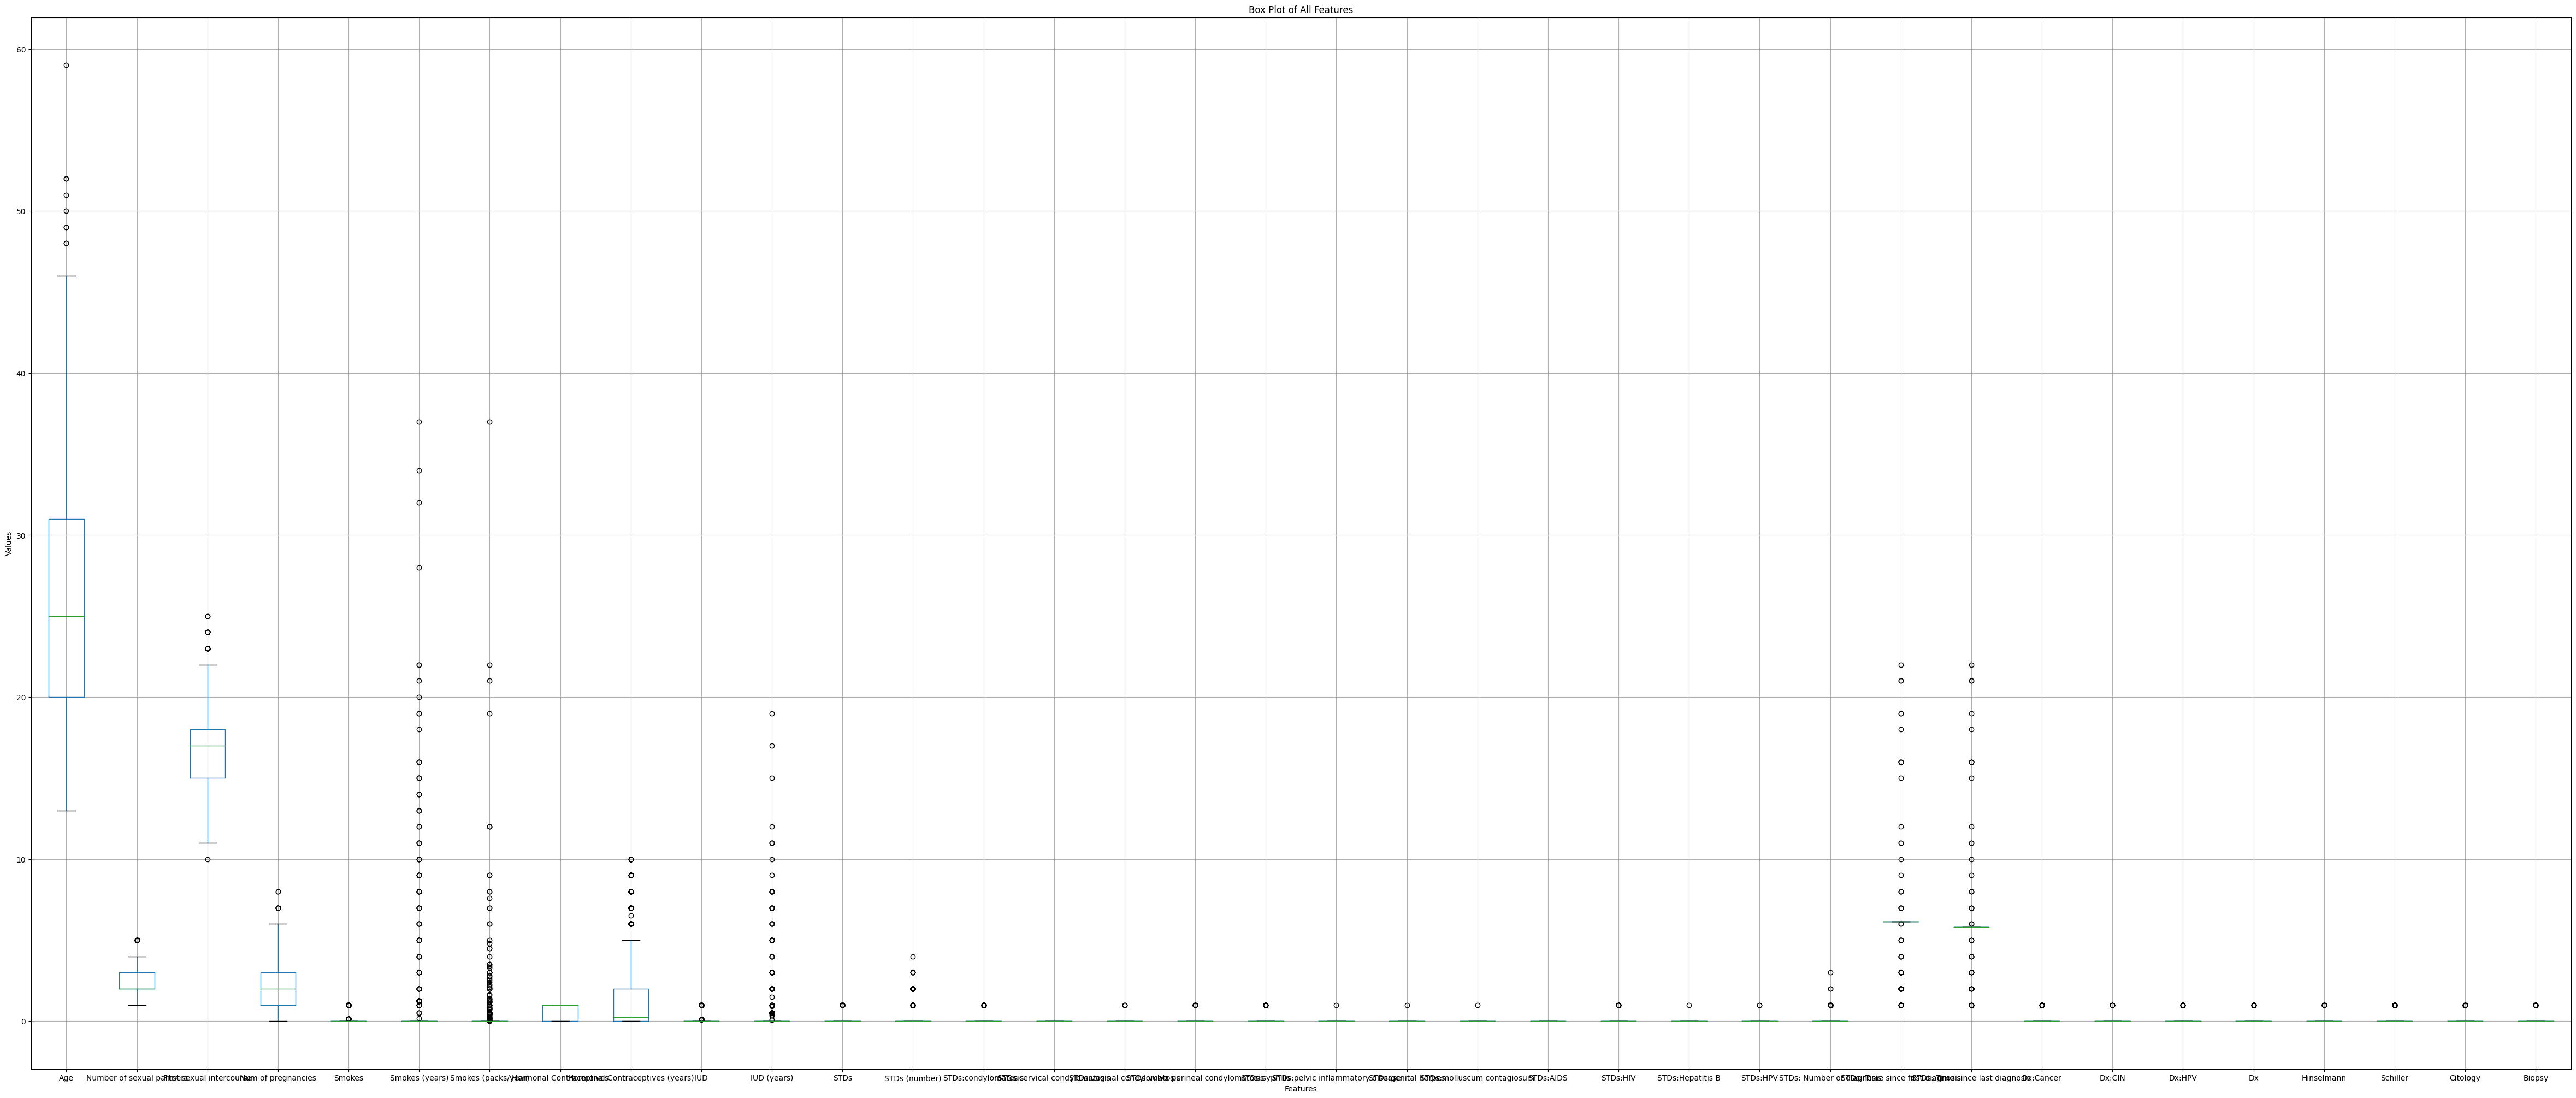

In [ ]:
# Create box plot for each column in DataFrame
df.boxplot(figsize=(60,25))

# Set plot title and axis labels
plt.title('Box Plot of All Features')
plt.xlabel('Features')
plt.ylabel('Values')

# Show plot
plt.show()

In [ ]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.00000,784.000000,...,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000
mean,26.070153,2.353316,16.723214,2.233266,0.139983,1.107527,0.415839,0.682398,1.54836,0.107410,...,6.155954,5.829531,0.019133,0.011480,0.019133,0.029337,0.039541,0.080357,0.047194,0.058673
std,7.672340,1.107925,2.228613,1.343563,0.344435,3.896496,2.193811,0.465841,2.51092,0.286616,...,1.745710,1.706169,0.137079,0.106594,0.137079,0.168856,0.195002,0.272019,0.212189,0.235163
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,6.140845,5.816901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.25000,0.000000,...,6.140845,5.816901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.00000,0.000000,...,6.140845,5.816901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,59.000000,5.000000,25.000000,8.000000,1.000000,37.000000,37.000000,1.000000,10.00000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now here we store target variables

In [ ]:
target_1 = df['Hinselmann'] 
target_2 = df['Schiller'] 
target_3 = df['Citology'] 
target_4 = df['Biopsy']

#target variables for testing those.

## Co- Realation Plot

Here we will display the co relation matrix

In [ ]:
corr_matrix = df.corr()
corr_matrix

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.183835,0.383113,0.495907,0.045073,0.211005,0.161005,0.052338,0.259979,0.295185,...,0.121951,0.145616,0.123799,0.081780,0.112870,0.126565,-0.006978,0.071341,-0.045183,0.044434
Number of sexual partners,0.183835,1.000000,-0.087067,0.161033,0.205877,0.144315,0.142422,0.034583,0.043659,0.087354,...,0.047560,0.056568,0.047935,0.041312,0.056344,0.040098,-0.041101,0.020091,0.043066,0.023271
First sexual intercourse,0.383113,-0.087067,1.000000,-0.041606,-0.122494,-0.048238,-0.019974,0.034544,0.097110,-0.023299,...,0.041403,0.050933,0.109329,-0.029617,0.075885,0.069118,0.004644,0.011455,-0.004750,0.013969
Num of pregnancies,0.495907,0.161033,-0.041606,1.000000,0.097858,0.177080,0.127433,0.141610,0.207896,0.206547,...,0.058649,0.076575,0.038146,0.011400,0.052015,0.028219,0.050306,0.069741,-0.052104,0.048195
Smokes,0.045073,0.205877,-0.122494,0.097858,1.000000,0.698714,0.466040,0.010137,0.080136,-0.045633,...,0.038692,0.046659,0.001239,-0.043824,0.028289,-0.067503,0.034342,0.047330,-0.000591,0.026905
Smokes (years),0.211005,0.144315,-0.048238,0.177080,0.698714,1.000000,0.736162,-0.008916,0.081144,0.045664,...,0.073432,0.080912,0.077966,-0.030650,0.080995,-0.047078,0.071244,0.074625,-0.011573,0.057898
Smokes (packs/year),0.161005,0.142422,-0.019974,0.127433,0.466040,0.736162,1.000000,-0.006684,0.031054,0.022075,...,0.048020,0.051503,0.133248,-0.020440,0.135427,-0.031412,-0.006084,-0.009905,-0.023374,-0.009314
Hormonal Contraceptives,0.052338,0.034583,0.034544,0.141610,0.010137,-0.008916,-0.006684,1.000000,0.420958,0.023043,...,0.016371,0.034361,0.015281,-0.003641,0.035281,0.004950,-0.002170,-0.060382,-0.054896,-0.051183
Hormonal Contraceptives (years),0.259979,0.043659,0.097110,0.207896,0.080136,0.081144,0.031054,0.420958,1.000000,0.036465,...,0.104131,0.116864,0.037159,0.024167,0.039645,0.022976,-0.012648,0.012347,-0.018096,0.001656
IUD,0.295185,0.087354,-0.023299,0.206547,-0.045633,0.045664,0.022075,0.023043,0.036465,1.000000,...,0.057374,0.067431,0.142665,0.057242,0.081294,0.157742,0.040727,0.105775,-0.015753,0.064333


### Co- Relation Plot

Here we are plotting the co relation matrix graph

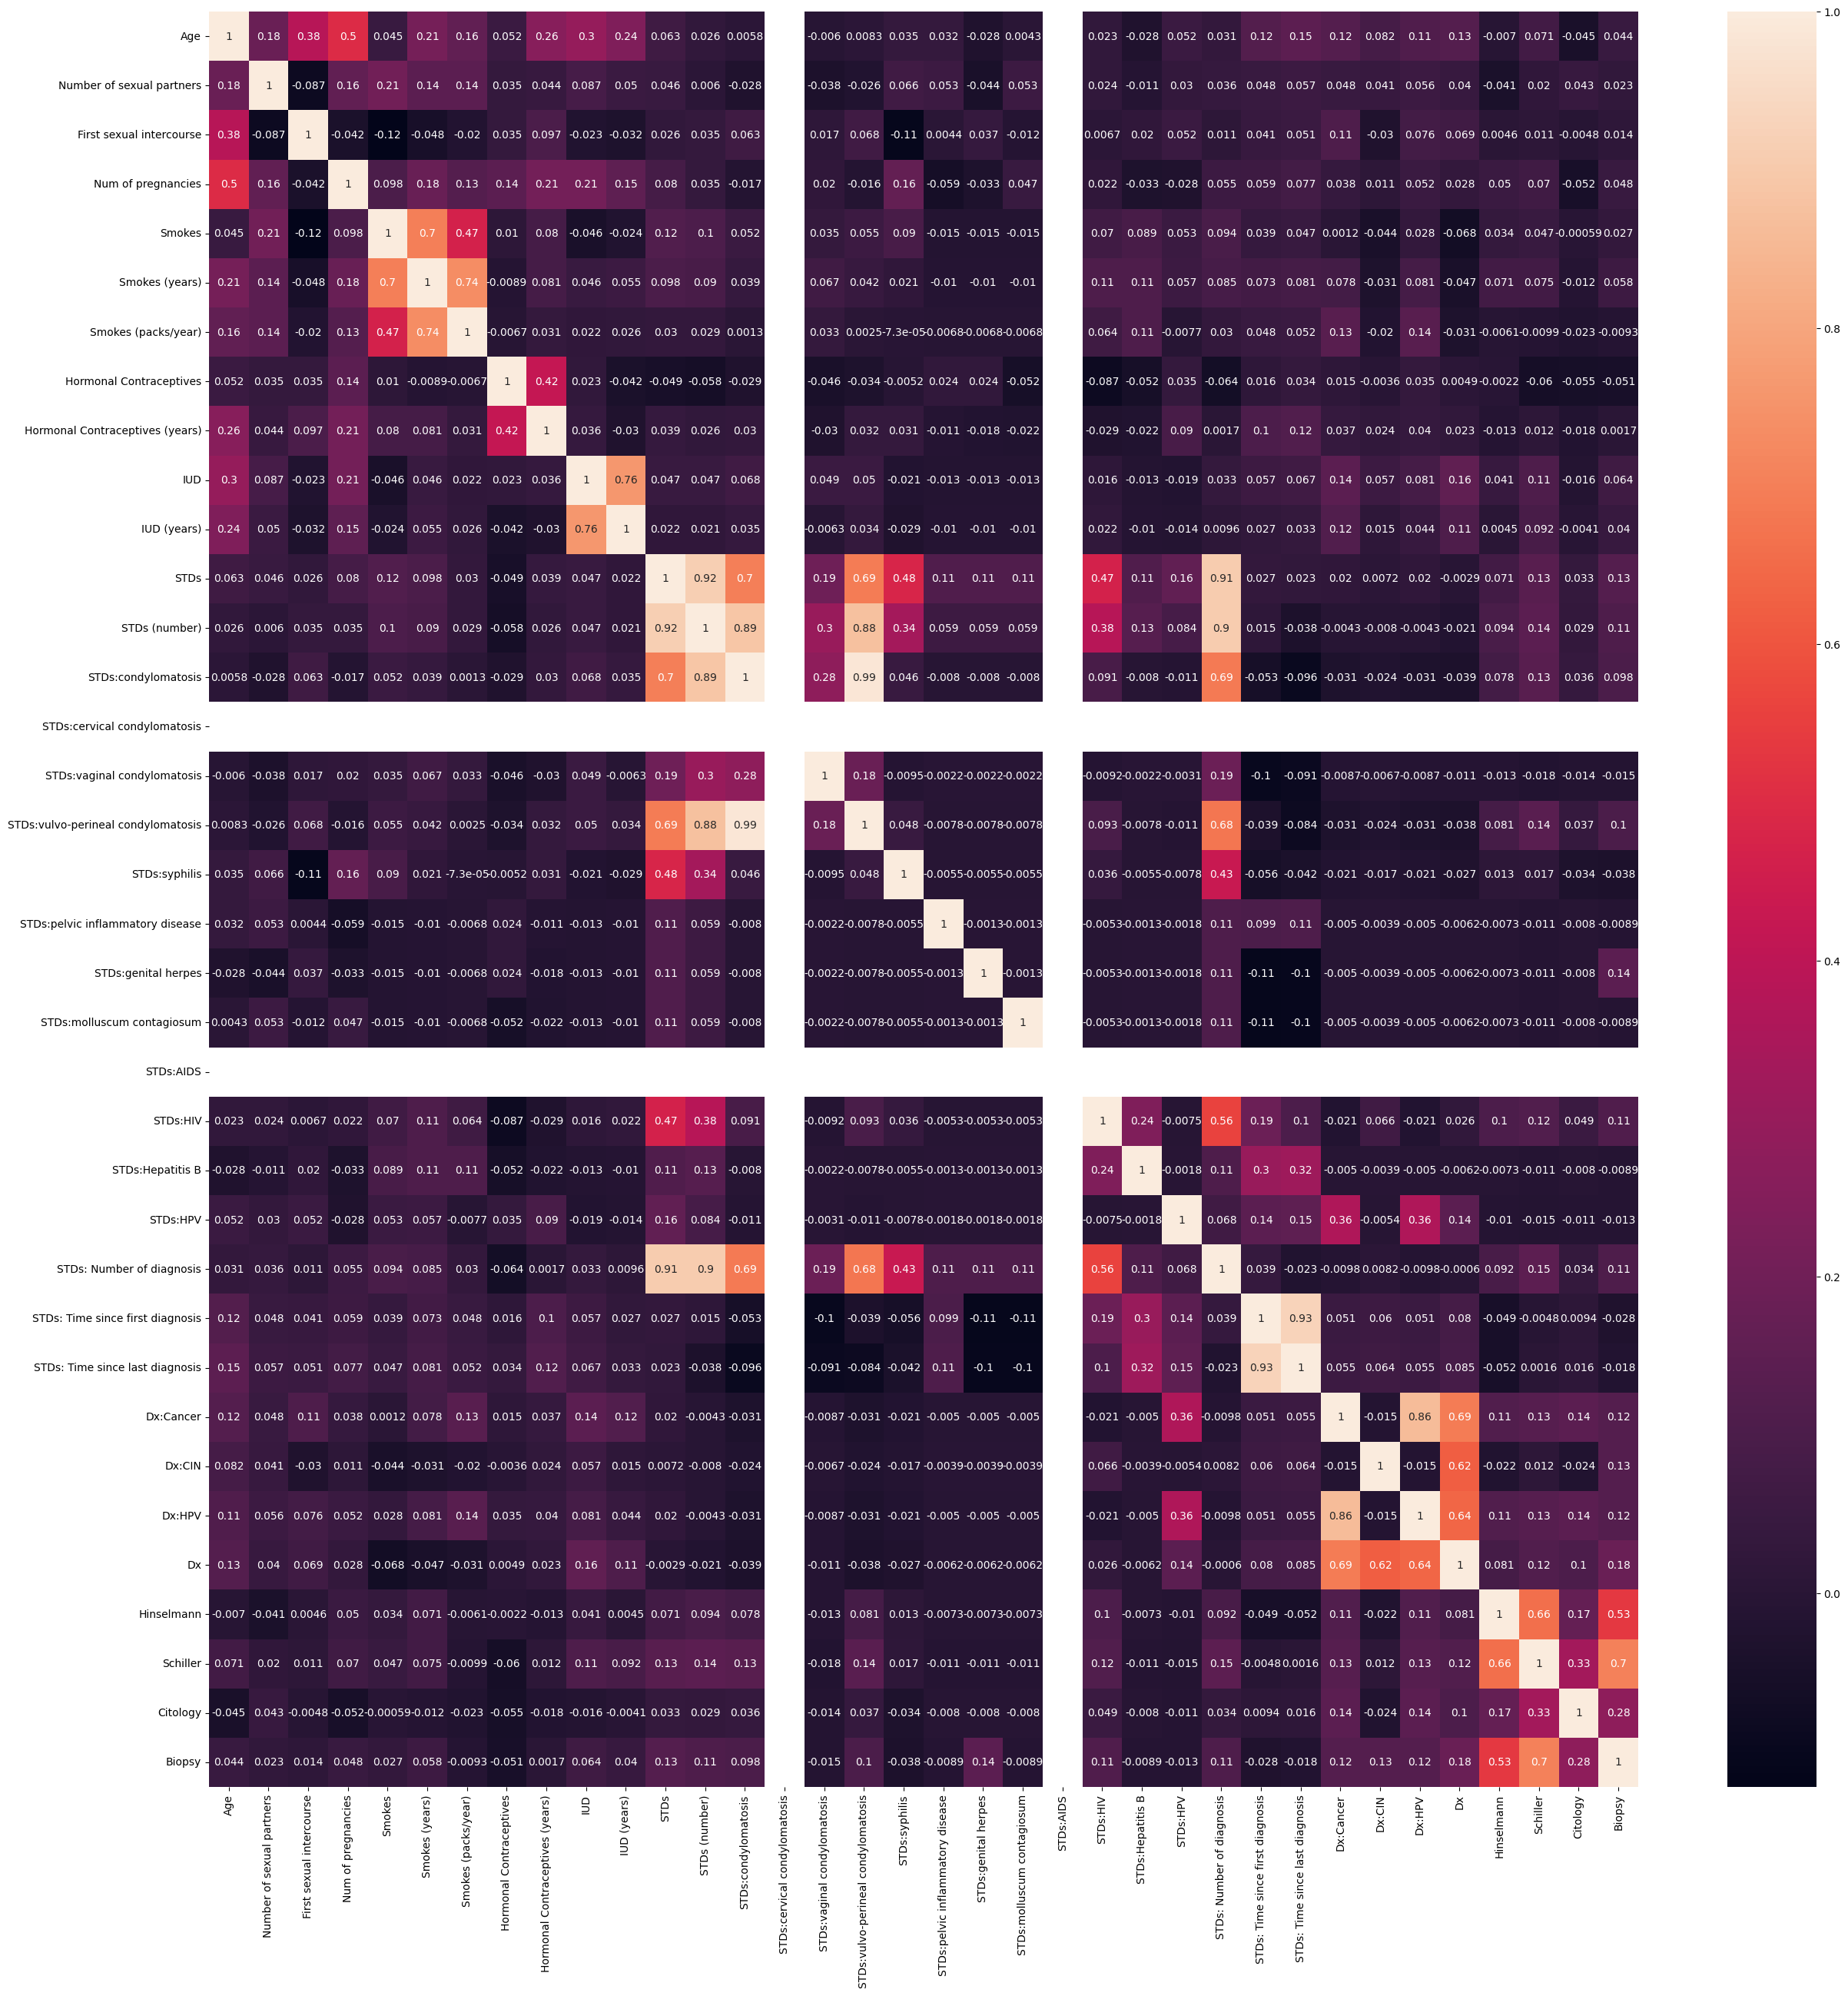

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize =(30,30))
sns.heatmap(corr_matrix, annot = True)
plt.show()

## Data Balancing

Here we use SMOTE to Balance data we split the data in two part 70 and 30 percent 

70 percent for training after balancing and remaining 30 percent for testing.

Here Databalancing done and stored for first target variable <mark>Hinselmann<mark>

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, target_1, test_size=0.3, random_state=1)
# , 'Schiller', 'Citology', 'Biopsy'
# drop the columns from X_train
X_train.drop(['Hinselmann'], axis=1, inplace=True)

# drop the same columns from X_test
X_test.drop(['Hinselmann'], axis=1, inplace=True)

X_test_h = X_test
y_test_h = y_test

# Instantiate the SMOTE object
smote = SMOTE(random_state=42)

# Fit and transform the training data using SMOTE
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train a SVM model on the balanced data
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_balanced, y_train_balanced)

# Test the model on the testing data
y_pred = svm_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Shape of X_train_balanced:", X_train_balanced.shape)


              precision    recall  f1-score   support

           0       0.99      0.98      0.98       225
           1       0.64      0.82      0.72        11

    accuracy                           0.97       236
   macro avg       0.82      0.90      0.85       236
weighted avg       0.97      0.97      0.97       236

Confusion Matrix:
[[220   5]
 [  2   9]]
Shape of X_train_balanced: (1056, 35)


KNN Classifier Evaluation Metrics for Hinselman :
Metric         Value     
-------------------------
Accuracy       0.82      
Precision      0.91      
Recall         0.82      


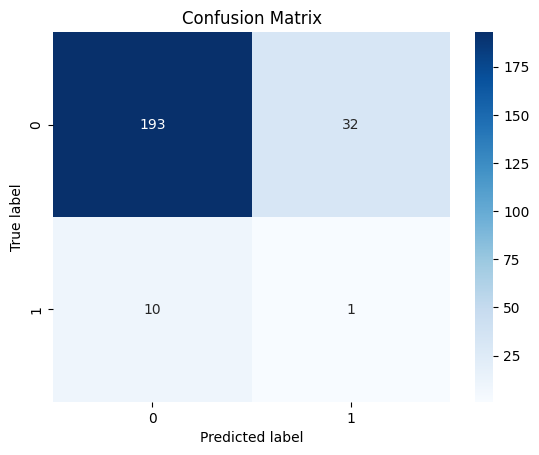

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X_train = X_train_balanced
y_train = y_train_balanced
X_test = X_test_h
y_test = y_test_h


# Create the classifier
model_knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
model_knn.fit(X_train, y_train)

# Use the trained classifier to make predictions on the testing data
y_pred = model_knn.predict(X_test)

# Calculate accuracy, precision, and recall scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)

# Print evaluation metrics
print("KNN Classifier Evaluation Metrics for Hinselman :")
# Print evaluation metrics in tabular format
print("{:<15}{:<10}".format("Metric", "Value"))
print("-"*25)
print("{:<15}{:<10.2f}".format("Accuracy", accuracy))
print("{:<15}{:<10.2f}".format("Precision", precision))
print("{:<15}{:<10.2f}".format("Recall", recall))
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


SVM Classifier Evaluation Metrics for Hinselmann:
Metric         Value     
-------------------------
Accuracy       0.97      
Precision      0.97      
Recall         0.97      


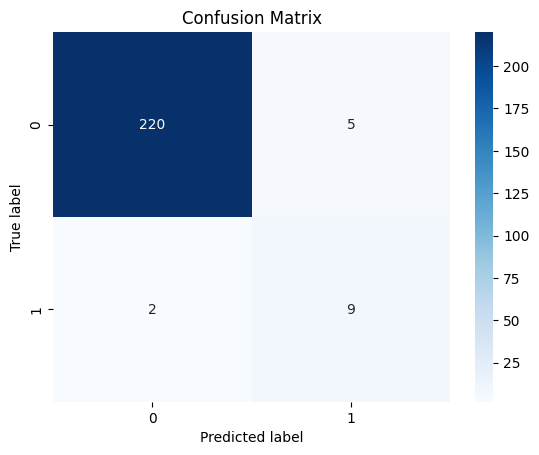

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



X_train = X_train_balanced
y_train = y_train_balanced
X_test = X_test_h
y_test = y_test_h


model_svm = LinearSVC(max_iter=200000)
model_svm = CalibratedClassifierCV(model_svm)
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)

print("SVM Classifier Evaluation Metrics for Hinselmann:")
# Print evaluation metrics in tabular format
print("{:<15}{:<10}".format("Metric", "Value"))
print("-"*25)
print("{:<15}{:<10.2f}".format("Accuracy", accuracy))
print("{:<15}{:<10.2f}".format("Precision", precision))
print("{:<15}{:<10.2f}".format("Recall", recall))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


## Data Balancing

Here we use SMOTE to Balance data we split the data in two part 70 and 30 percent 

70 percent for training after balancing and remaining 30 percent for testing.

Here Databalancing done and stored for first target variable <mark>Schiller<mark>

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, target_2, test_size=0.3, random_state=1)

# drop the columns from X_train
X_train.drop([ 'Schiller'], axis=1, inplace=True)

# drop the same columns from X_test
X_test.drop(['Schiller'], axis=1, inplace=True)

X_test_s = X_test
y_test_s = y_test

# Instantiate the SMOTE object
smote = SMOTE(random_state=42)

# Fit and transform the training data using SMOTE
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train a SVM model on the balanced data
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_balanced, y_train_balanced)

# Test the model on the testing data
y_pred = svm_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Shape of X_train_balanced:", X_train_balanced.shape)


              precision    recall  f1-score   support

           0       0.98      0.96      0.97       220
           1       0.55      0.69      0.61        16

    accuracy                           0.94       236
   macro avg       0.76      0.82      0.79       236
weighted avg       0.95      0.94      0.94       236

Confusion Matrix:
[[211   9]
 [  5  11]]
Shape of X_train_balanced: (1002, 35)


KNN Classifier Evaluation Metrics for Schiller:
Metric         Value     
-------------------------
Accuracy       0.75      
Precision      0.87      
Recall         0.75      


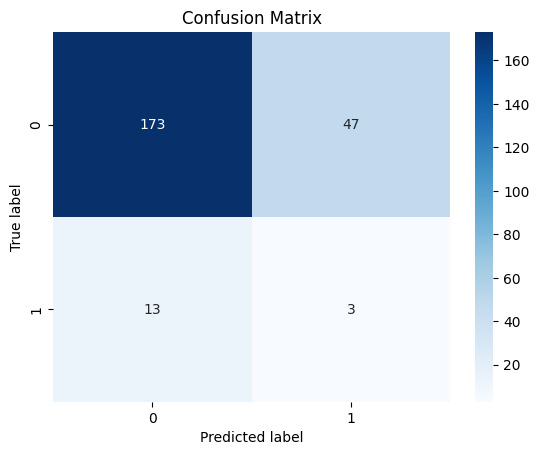

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X_train = X_train_balanced
y_train = y_train_balanced
X_test = X_test_s
y_test = y_test_s


# Create the classifier
model_knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
model_knn.fit(X_train, y_train)

# Use the trained classifier to make predictions on the testing data
y_pred = model_knn.predict(X_test)

# Calculate accuracy, precision, and recall scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)

# Print evaluation metrics
print("KNN Classifier Evaluation Metrics for Schiller:")
# Print evaluation metrics in tabular format
print("{:<15}{:<10}".format("Metric", "Value"))
print("-"*25)
print("{:<15}{:<10.2f}".format("Accuracy", accuracy))
print("{:<15}{:<10.2f}".format("Precision", precision))
print("{:<15}{:<10.2f}".format("Recall", recall))
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


SVM Classifier Evaluation Metrics for Schiller:
Metric         Value     
-------------------------
Accuracy       0.91      
Precision      0.94      
Recall         0.91      


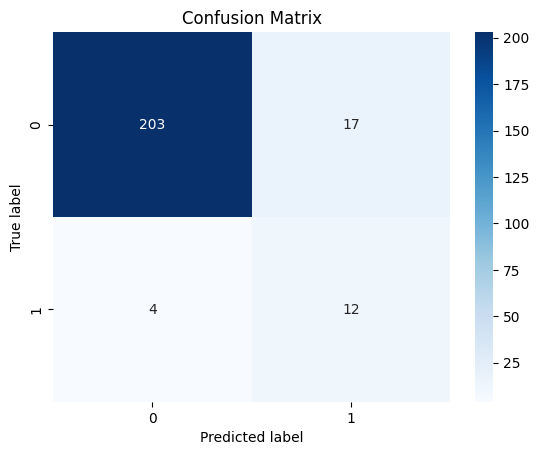

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



X_train = X_train_balanced
y_train = y_train_balanced
X_test = X_test_s
y_test = y_test_s


model_svm = LinearSVC(max_iter=200000)
model_svm = CalibratedClassifierCV(model_svm)
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)

print("SVM Classifier Evaluation Metrics for Schiller:")
# Print evaluation metrics in tabular format
print("{:<15}{:<10}".format("Metric", "Value"))
print("-"*25)
print("{:<15}{:<10.2f}".format("Accuracy", accuracy))
print("{:<15}{:<10.2f}".format("Precision", precision))
print("{:<15}{:<10.2f}".format("Recall", recall))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## Data Balancing

Here we use SMOTE to Balance data we split the data in two part 70 and 30 percent 

70 percent for training after balancing and remaining 30 percent for testing.

Here Databalancing done and stored for first target variable <mark>Citology<mark>

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, target_3, test_size=0.3, random_state=1)

# drop the columns from X_train
X_train.drop(['Citology'], axis=1, inplace=True)

# drop the same columns from X_test
X_test.drop(['Citology'], axis=1, inplace=True)

X_test_c = X_test
y_test_c = y_test

# Instantiate the SMOTE object
smote = SMOTE(random_state=42)

# Fit and transform the training data using SMOTE
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train a SVM model on the balanced data
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_balanced, y_train_balanced)

# Test the model on the testing data
y_pred = svm_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Shape of X_train_balanced:", X_train_balanced.shape)


              precision    recall  f1-score   support

           0       0.96      0.71      0.82       227
           1       0.04      0.33      0.08         9

    accuracy                           0.70       236
   macro avg       0.50      0.52      0.45       236
weighted avg       0.93      0.70      0.79       236

Confusion Matrix:
[[162  65]
 [  6   3]]
Shape of X_train_balanced: (1040, 35)


KNN Classifier Evaluation Metricsfor Citology:
Metric         Value     
-------------------------
Accuracy       0.73      
Precision      0.94      
Recall         0.73      


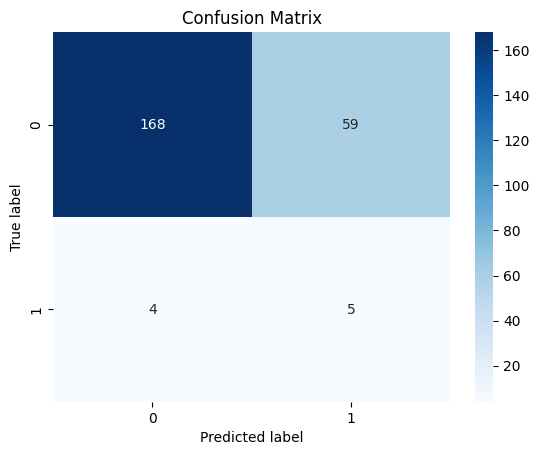

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X_train = X_train_balanced
y_train = y_train_balanced
X_test = X_test_c
y_test = y_test_c


# Create the classifier
model_knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
model_knn.fit(X_train, y_train)

# Use the trained classifier to make predictions on the testing data
y_pred = model_knn.predict(X_test)

# Calculate accuracy, precision, and recall scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)

# Print evaluation metrics
print("KNN Classifier Evaluation Metricsfor Citology:")
# Print evaluation metrics in tabular format
print("{:<15}{:<10}".format("Metric", "Value"))
print("-"*25)
print("{:<15}{:<10.2f}".format("Accuracy", accuracy))
print("{:<15}{:<10.2f}".format("Precision", precision))
print("{:<15}{:<10.2f}".format("Recall", recall))
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


SVM Classifier Evaluation Metrics for citology:
Metric         Value     
-------------------------
Accuracy       0.72      
Precision      0.93      
Recall         0.72      


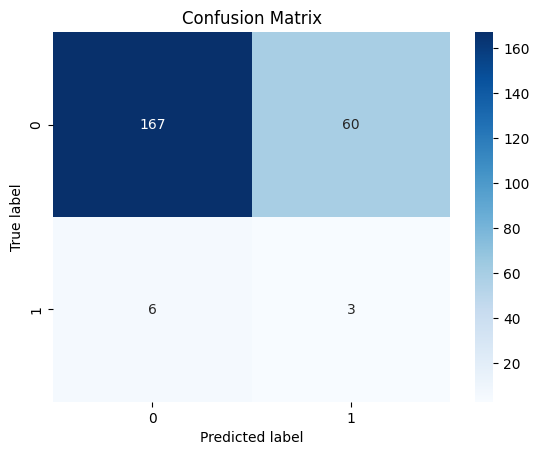

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



X_train = X_train_balanced
y_train = y_train_balanced
X_test = X_test_c
y_test = y_test_c


model_svm = LinearSVC(max_iter=200000)
model_svm = CalibratedClassifierCV(model_svm)
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)

print("SVM Classifier Evaluation Metrics for citology:")
# Print evaluation metrics in tabular format
print("{:<15}{:<10}".format("Metric", "Value"))
print("-"*25)
print("{:<15}{:<10.2f}".format("Accuracy", accuracy))
print("{:<15}{:<10.2f}".format("Precision", precision))
print("{:<15}{:<10.2f}".format("Recall", recall))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## Data Balancing

Here we use SMOTE to Balance data we split the data in two part 70 and 30 percent 

70 percent for training after balancing and remaining 30 percent for testing.

Here Databalancing done and stored for first target variable <mark>Biopsy<mark>

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, target_4, test_size=0.3, random_state=1)

# drop the columns from X_train
X_train.drop(['Biopsy'], axis=1, inplace=True)

# drop the same columns from X_test
X_test.drop([ 'Biopsy'], axis=1, inplace=True)

X_test_b = X_test
y_test_b = y_test

# Instantiate the SMOTE object
smote = SMOTE(random_state=42)

# Fit and transform the training data using SMOTE
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train a SVM model on the balanced data
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_balanced, y_train_balanced)

# Test the model on the testing data
y_pred = svm_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Shape of X_train_balanced:", X_train_balanced.shape)


              precision    recall  f1-score   support

           0       0.99      0.96      0.98       225
           1       0.50      0.73      0.59        11

    accuracy                           0.95       236
   macro avg       0.74      0.85      0.78       236
weighted avg       0.96      0.95      0.96       236

Confusion Matrix:
[[217   8]
 [  3   8]]
Shape of X_train_balanced: (1026, 35)


KNN Classifier Evaluation Metrics for Biopsy:
Metric         Value     
-------------------------
Accuracy       0.82      
Precision      0.91      
Recall         0.82      


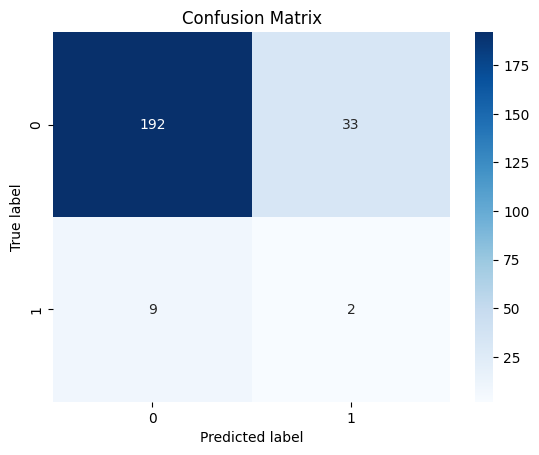

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X_train = X_train_balanced
y_train = y_train_balanced
X_test = X_test_b
y_test = y_test_b


# Create the classifier
model_knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
model_knn.fit(X_train, y_train)

# Use the trained classifier to make predictions on the testing data
y_pred = model_knn.predict(X_test)

# Calculate accuracy, precision, and recall scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)

# Print evaluation metrics
print("KNN Classifier Evaluation Metrics for Biopsy:")

# Print evaluation metrics in tabular format
print("{:<15}{:<10}".format("Metric", "Value"))
print("-"*25)
print("{:<15}{:<10.2f}".format("Accuracy", accuracy))
print("{:<15}{:<10.2f}".format("Precision", precision))
print("{:<15}{:<10.2f}".format("Recall", recall))


# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


SVM Classifier Evaluation Metrics for Biopsy:
Metric         Value     
-------------------------
Accuracy       0.95      
Precision      0.96      
Recall         0.95      


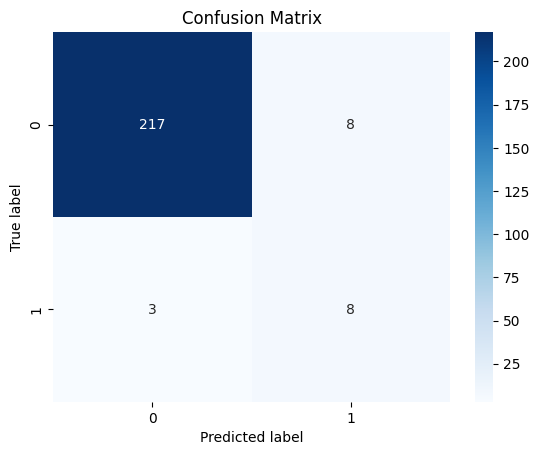

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



X_train = X_train_balanced
y_train = y_train_balanced
X_test = X_test_b
y_test = y_test_b


model_svm = LinearSVC(max_iter=200000)
model_svm = CalibratedClassifierCV(model_svm)
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)

print("SVM Classifier Evaluation Metrics for Biopsy:")
# Print evaluation metrics in tabular format
print("{:<15}{:<10}".format("Metric", "Value"))
print("-"*25)
print("{:<15}{:<10.2f}".format("Accuracy", accuracy))
print("{:<15}{:<10.2f}".format("Precision", precision))
print("{:<15}{:<10.2f}".format("Recall", recall))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()